In [1]:
import pandas as pd
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math
from collections import Counter
from scipy.integrate import quad
from scipy.stats import pareto
from IPython.display import display, HTML
import os

In [2]:
#formula 1

def calculate_G(graph):
    degrees_list = []
    sum_difference = 0
    for node_index, deg in graph.degree():
        degrees_list.append(deg)
    degrees = np.array(degrees_list)
    N = len(degrees)
    mean_degree = np.mean(degrees)

    for i in range(N):
        for j in range(N):
            sum_difference += abs(degrees[i]-degrees[j])

    G = sum_difference / (2 * N ** 2 * mean_degree)
    return np.round(G, 2)

In [3]:
graph = nx.barabasi_albert_graph(16, 5)
barabasi_graph = nx.barabasi_albert_graph(12, 5)
star_graph = nx.star_graph(400)

G = calculate_G(graph)
G_B = calculate_G(barabasi_graph)
G_S = calculate_G(star_graph)

print("gini index: ", G)
print("gini index barabasi: ", G_B)
print("gini index star graph: ", G_S)

gini index:  0.21
gini index barabasi:  0.22
gini index star graph:  0.5


In [4]:
#formula 2

def sum_probabilities(graph):
    degrees = np.array([deg for _, deg in graph.degree()])
    # print(degrees)
    sum_degrees = np.sum(degrees)
    probabilities = degrees/sum_degrees
    sum_probabilities = np.sum(probabilities)

    return np.round(sum_probabilities,2)

p = sum_probabilities(graph)
print("sum of probabilities: ",p)

sum of probabilities:  1.0


In [5]:
#formula 3

def density_degree(graph):
    degrees = np.array([deg for _, deg in graph.degree()])
    degree_count = Counter(degrees)
    total_nodes = len(degrees)
    density = {}
    # probabilities = []
    sum_list = 0
    for degree, count in degree_count.items():
        density[int(degree)] = count/total_nodes
        # probabilities.append(count/total_nodes)
        sum_list += count/total_nodes
    # print(np.round(sum_list,2))
    # print(np.round(np.sum(probabilities)),2)
    return density
    
d = density_degree(graph)
print(d)

{14: 0.0625, 4: 0.0625, 7: 0.3125, 1: 0.0625, 6: 0.1875, 12: 0.0625, 8: 0.125, 5: 0.125}


In [6]:
#formula 4

def x_total(graph):
    degrees = np.array([deg for _, deg in graph.degree()])
    # print(sum(degrees))
    N_total = len(degrees)
    density = density_degree(graph)
    term = []
    for degree, p in density.items():
        term.append(degree*p)
    sum_term = np.sum(term)
    X_total = sum_term*N_total

    return int(X_total)

x = x_total(graph)
print("sum of degrees: ",x)

sum of degrees:  110


In [7]:
#formula 5

def x_avg_first(graph):
    degrees = np.array([deg for _,deg in graph.degree()])
    N_total = len(degrees)
    density = density_degree(graph)
    term = []
    for degree, p in density.items():
        term.append(degree*p)
    avg = np.sum(term)
    return np.round(avg,2)

def x_avg_second(graph):
    degrees = np.array([deg for _,deg in graph.degree()])
    X_total = np.sum(degrees)
    N_total = len(degrees)

    avg = X_total / N_total
    return np.round(avg,2)

avg1 = x_avg_first(graph)
avg2 = x_avg_second(graph)

print("average(first): ", avg1)
print("average(second): ", avg2)
    

average(first):  6.88
average(second):  6.88


In [8]:
#formula 6

def c_bar(graph, x):
    degrees = np.sort(np.array([deg for _,deg in graph.degree()]))
    sum_degrees = np.sum(degrees)
    density = density_degree(graph)

    degrees_list = []
    for degree, p in density.items():
        if degree >= x :
            degrees_list.append(p)

    return np.round(np.sum(degrees_list),2)


c = c_bar(graph, 4)
print("c: ",c)
c2 = c_bar(graph, 0)
print("c2: ", c2)

complete_graph = nx.complete_graph(2) #with two nodes!!!
c_complete = c_bar(complete_graph,0)
print("c_complete: ", c_complete)

c:  0.94
c2:  1.0
c_complete:  1.0


In [9]:
#formula 7

def F_bar(graph, x):
    degrees = np.array([deg for _,deg in graph.degree()])
    mean_x = np.mean(degrees)
    density = density_degree(graph)

    term = []
    for degree, p in density.items():
        if degree >= x :
            term.append(degree*p)
    term = term/mean_x

    return np.round(np.sum(term),2)


f = F_bar(graph, 2)
print("f: ",f)
f2 = F_bar(graph, 0)
print("f2: ", f2)
f_complete = F_bar(complete_graph, 0)
print("f_complete: ", f_complete)

f:  0.99
f2:  1.0
f_complete:  1.0


In [10]:
#formula 8

def calculate_x_p_first_20_percernt(graph):
    degrees = np.sort(np.array([deg for _,deg in graph.degree()]))
    N = len(degrees)
    twenty_per_cent = np.ceil((20/100) * N)
    twenty_per_cent_items = []
    for i in range(int(twenty_per_cent)):
        twenty_per_cent_items.append(int(degrees[-(i+1)]))
    twenty_per_cent_items.sort()
    last_item = twenty_per_cent_items[0]
    return last_item


x_p = calculate_x_p_first_20_percernt(graph)
print("x_p: ", x_p)

c_p = c_bar(graph, x_p)
print("c_p: ",c_p)

f_p = F_bar(graph, x_p)
print("f_p: ", f_p)

print("f_p+c_p: ", np.round(c_p+f_p,2))

x_p:  8
c_p:  0.25
f_p:  0.38
f_p+c_p:  0.63


In [11]:
#formula 9

# graph = nx.barabasi_albert_graph(10, 5)

def left_equation(graph):
    degrees = np.sort(np.array([deg for _,deg in graph.degree()]))
    mean_degrees = np.mean(degrees)
    density = density_degree(graph)
    term = 0
    for degree, p in density.items():
        term += (1+(degree/mean_degrees)) * p
        
    return np.round(term,2)

def right_equation(graph):
    c_term = c_bar(graph, 0)
    F_term = F_bar(graph, 0)
    final = c_term + F_term

    return final
    
r = right_equation(graph)
print("right equation: ",r)
l = left_equation(graph)
print("left equation: ",l)

right equation:  2.0
left equation:  2.0


In [12]:
#formula 10

def gini_index(graph):
    degrees = np.array([deg for _, deg in graph.degree()])
    mean_degree = np.mean(degrees) 
    density = density_degree(graph)
    
    gini_sum = 0
    for x, p_x in density.items():
        for y, p_y in density.items():
            gini_sum += abs(x - y) * p_x * p_y 

    gini_index_value = (1 / (2 * mean_degree)) * gini_sum 

    return np.round(gini_index_value,2)


def gini_partial(graph):
    degrees = np.array([deg for _, deg in graph.degree()])
    mean_degree = np.mean(degrees)

    density = density_degree(graph)

    gini_sum = 0
    for x, p_x in density.items():
        for y, p_y in density.items():
            if y >= x:
                gini_sum += (y - x) * p_x * p_y  

    gini_partial_value = (1 / mean_degree) * gini_sum

    return np.round(gini_partial_value, 2)


#formula 11

def gini_integral(graph):
    degrees = np.array([deg for _, deg in graph.degree()])
    mean_degree = np.mean(degrees)
    density = density_degree(graph)

    gini_sum = 0
    for x, p_x in density.items():
        F_x = F_bar(graph, x)
        C_x = c_bar(graph, x)
        gini_sum += p_x * (F_x - (x / mean_degree) * C_x)

    return np.round(gini_sum, 2)

star_graph = nx.star_graph(200)

gini_value = gini_integral(graph)
print("Gini Value:", gini_value)
star_gini_value = gini_integral(star_graph)
print("star Gini Value:", star_gini_value)
gini_part = gini_partial(graph)
print("Gini Partial:", gini_part)
star_gini_part = gini_partial(star_graph)
print("star Gini Partial:", star_gini_part)
gini = gini_index(graph)
print("Gini Index:", gini)
star_gini = gini_index(star_graph)
print("star Gini Index:", star_gini)
gini2 = calculate_G(graph)
print("G: ", gini2)
star_gini2 = calculate_G(star_graph)
print("star G: ", star_gini2)

Gini Value: 0.21
star Gini Value: 0.5
Gini Partial: 0.21
star Gini Partial: 0.5
Gini Index: 0.21
star Gini Index: 0.5
G:  0.21
star G:  0.5


In [13]:
#formula 12

def h_bar(graph, x):
    degrees = np.array([deg for _,deg in graph.degree()])
    # print(degrees)
    mean_degrees = np.mean(degrees)
    f = F_bar(graph,x)
    c = c_bar(graph,x)
    result = (mean_degrees*f) - (x*c)
    return np.round(result)
    
def h_bar1(graph, x):
    degrees = np.array([deg for _,deg in graph.degree()])
    num_range = [i for i in range(len(degrees)) if i>x]
    result = 0
    for i in num_range:
        result += c_bar(graph,i)
    return np.round(result)


def h_bar_second(graph, x):
    degrees = np.array([deg for _,deg in graph.degree()])
    densities = density_degree(graph)

    sum_ = 0
    for i in range(x, max(degrees)):
        inner_sum = 0
        for y in range(i , max(degrees)):
          inner_sum += densities.get(y+1, 0)
        sum_ += inner_sum

    return np.round(sum_)
    

def h_bar_third(graph, x):
    degrees = np.array([deg for _, deg in graph.degree()])
    densities = density_degree(graph)

    sum_ = 0
    for z in range(x, max(degrees)+1):
        inner_sum = 0
        for y in range(x, z):
            inner_sum += densities.get(z, 0)
        sum_ += inner_sum

    return np.round(sum_)


def h_bar_fourth(graph, x):
    degrees = np.array([deg for _, deg in graph.degree()])
    densities = density_degree(graph)

    sum_ = 0
    for z in range(x, max(degrees)+1):
        sum_ += (z-x)*densities.get(z, 0)

    return np.round(sum_)



c = h_bar(graph, 3)
print("h_bar:", c)
c2 = h_bar1(graph, 3)
print("h_bar1:", c2)
c3 = h_bar_second(graph, 3)
print("h_bar2:", c3)
c4 = h_bar_third(graph, 3)
print("h_bar3:", c4)
c5 = h_bar_fourth(graph, 3)
print("h_bar3:", c5)

h_bar: 4.0
h_bar1: 4.0
h_bar2: 4.0
h_bar3: 4.0
h_bar3: 4.0


In [14]:
#formula 15

def G(graph):
    degrees = np.array([deg for _, deg in graph.degree()])
    mean_degree = np.mean(degrees)
    result_list = [] 
    for i in range(1,len(degrees)):
        result_list.append((c_bar(graph, i)**2)) 

    result = np.sum(result_list)
    G = 1 - ((1 / mean_degree) * result)
    return np.round(G,2)


def G_second(graph):
    degrees = np.array([deg for _, deg in graph.degree()])
    mean_degree = np.mean(degrees)
    
    result = 0
    for i in range(len(degrees)):
        result += c_bar(graph, i) * (1-c_bar(graph, i))
    
    return np.round(result/mean_degree,2)
    
    
g = G(graph)
print("G :", g)
g2 = G_second(graph)
print("G2 :", g)

G : 0.21
G2 : 0.21


In [15]:
#formula 17

def sigma_x(graph, x):
    f_bar_ = F_bar(graph, x)
    c_bar_ = c_bar(graph, x)
    result = f_bar_ - c_bar_

    return result


def sigma_x_second(graph, x):
    degrees = np.array([deg for _,deg in graph.degree()])
    mean_x = np.mean(degrees)
    densities = density_degree(graph)

    term = 0
    for y in range(x, max(degrees)+1):
        term += ((y/mean_x)-1)*densities.get(y, 0)
    return term

#----------------------------------------------------------------------------------------------------------------------------
#formula 18

def sigma_x_third(graph, x):
    f = 1-F_bar(graph, x)
    c = 1-c_bar(graph, x)
    result = c - f

    return result

def sigma_x_fourth(graph, x):
    degrees = np.array([deg for _,deg in graph.degree()])
    mean_x = np.mean(degrees)
    densities = density_degree(graph)

    term = 0
    for y in range(0,x):
        term += (1-(y/mean_x))*densities.get(y, 0)
    return term

s = sigma_x(graph, 5)
print("sigma_x: ", s)
s1 = sigma_x_second(graph, 5)
print("sigma_x_2: ", s1)
s2 = sigma_x_third(graph, 5)
print("sigma_x_3: ", s2)
s3 = sigma_x_fourth(graph, 5)
print("sigma_x_4: ", s3)

sigma_x:  0.06999999999999995
sigma_x_2:  0.07954545454545447
sigma_x_3:  0.06999999999999995
sigma_x_4:  0.07954545454545454


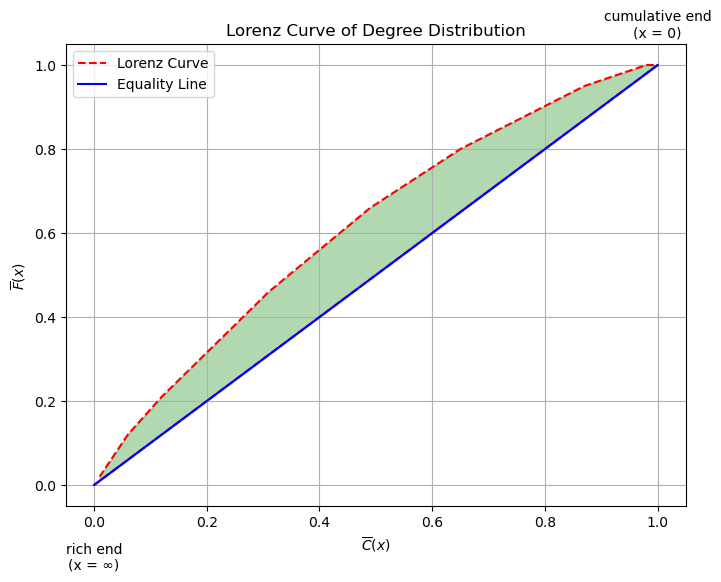

<Figure size 640x480 with 0 Axes>

In [16]:
#figure 1 

def plot_lorenz_curve(graph):
    x_values = np.linspace(0, max([deg for _, deg in graph.degree()]), 100)
    C_values = [0,]
    F_values = [0,]

    for x in x_values : 
        F_values.append(F_bar(graph, x))
        C_values.append(c_bar(graph, x))
        
    plt.figure(figsize=(8, 6))
    plt.plot(C_values, F_values, linestyle='--', color='red', label='Lorenz Curve')
    plt.plot([0, 1], [0, 1], color='blue', label='Equality Line')
    
    plt.fill_between(C_values, F_values, C_values, color='green', alpha=0.3)

    plt.text(0, -0.20, 'rich end\n(x = ∞)', ha='center', color='black')
    plt.text(1, 1.068, 'cumulative end\n(x = 0)', ha='center', color='black')
    
    plt.xlabel(r'$\overline{C}(x)$')
    plt.ylabel(r'$\overline{F}(x)$')
    
    plt.title("Lorenz Curve of Degree Distribution")
    plt.legend()
    plt.grid()

    plt.show()

    save_dir = "pics"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    save_path = os.path.join(save_dir, "lorenz_curve.png")
    plt.savefig(save_path)

G = nx.erdos_renyi_graph(100, 0.05)
plot_lorenz_curve(G)

In [17]:
#formula 20

def big_sigma_20(graph):
    degrees = np.array([deg for _,deg in graph.degree()])
    mean_x = np.mean(degrees)
    densities = density_degree(graph)

    sum_ = 0
    for x in range(1,max(degrees)+1):
        sum_inner = 0
        for y in range(x,max(degrees)+1):
            sum_inner += ((y/mean_x)-1)*densities.get(y-1,0)
        sum_ += sum_inner * densities.get(x-1, 0)
    return sum_

b2 = big_sigma_20(graph)
print("big sigma (formula 20): ",b2)

big sigma (formula 20):  0.1169744318181818


In [18]:
#formula 21

def big_sigma_21_second(graph):
    degrees = np.array([deg for _,deg in graph.degree()])
    mean_x = np.mean(degrees)
    densities = density_degree(graph)

    sum_ = 0
    for y in range(1,max(degrees)+1):
       sum_ += (1-c_bar(graph, y)) * ((y/mean_x)-1) * densities.get(y-1,0)
    return sum_


def big_sigma_21_first(graph):
    degrees = np.array([deg for _,deg in graph.degree()])
    mean_x = np.mean(degrees)
    densities = density_degree(graph)

    sum_ = 0
    for y in range(1,max(degrees)+1):
        sum_inner = 0
        for x in range(1,y+1):
            sum_inner += densities.get(x-1,0)*((y/mean_x)-1)*densities.get(y-1, 0)
        sum_ += sum_inner
    return sum_



b = big_sigma_21_second(graph)
print("big sigma second (formula 21): ",b)
b1 = big_sigma_21_first(graph)
print("big sigma first (formula 21): ",b1)


big sigma second (formula 21):  0.11751136363636361
big sigma first (formula 21):  0.11697443181818179


In [19]:
#formula 22

def big_sigma_(graph):
    degrees = np.sort(np.array([deg for _,deg in graph.degree()]))
    mean_x = np.mean(degrees)
    term1 = 1/2 * (c_bar(graph,0)**2)

    sum_ = 0
    for y in range(1,max(degrees)):
        sum_ += (c_bar(graph,y)**2)
        
    term2 = (1/(2*mean_x))*sum_

    result = term1 - term2
    return np.round(result,2)

t = big_sigma_(graph)
print("big sigma: ",t)
print("1/2 * G: ",calculate_G(graph)/2)

big sigma:  0.11
1/2 * G:  0.105


In [20]:
#formula 23

def theta(x):
    if x < 0:
        return 0
    elif x == 0:
        return 0.5
    else:
        return 1

#formula 24

def s_sigma(graph):
    degrees = np.array([deg for _,deg in graph.degree()])
    return F_bar(graph, 0) - c_bar(graph, 0) 

g = nx.complete_graph(12)  # like comminism
result = s_sigma(g)
print("result: ", result)

result:  0.0


In [21]:
#formula 25

def create_income_graph_communism_pp(num_nodes, a, b, w):
    num_low_income = int(num_nodes * w)
    num_high_income = num_nodes - num_low_income
    G = nx.Graph()
    
    for i in range(num_low_income):
        G.add_node(i, income=a)
    
    for i in range(num_low_income, num_nodes):
        G.add_node(i, income=b)
    
    return G


def calculate_c_bar_communism_pp(G, x):
    incomes = np.array([data['income'] for _, data in G.nodes(data=True)])
    
    a = incomes.min() 
    b = incomes.max()
    
    w = np.sum(incomes == a) / len(incomes)
    result = w * (x >= a) + (1 - w) * (x >= b)

    return result

G_generated = create_income_graph_communism_pp(10, 1, 8, 0.1)
c_ = calculate_c_bar_communism_pp(G_generated, 5)
print("c_bar communism ++: ", c_)

c_bar communism ++:  0.1


In [22]:
#formula 26

def calculate_gini_index_communism_pp(G):
    incomes = np.array([data['income'] for _, data in G.nodes(data=True)])
    
    a = incomes.min()
    b = incomes.max()
    
    w = np.sum(incomes == a) / len(incomes)
    
    mean_income = np.mean(incomes)
    
    G_index = ((b - a) * w * (1 - w)) / mean_income
    
    return G_index



def calculate_g_index_communism_pp_second(G):
    incomes = np.array([data['income'] for _, data in G.nodes(data=True)])
    
    a = incomes.min()
    b = incomes.max()
    mean_income = incomes.mean()
    
    G_index = ((mean_income - a) * (b - mean_income)) / ((b - a) * mean_income)
    
    return G_index


#formula 27
def calculate_g_index_communism_pp_third(G):
    incomes = np.array([data['income'] for _, data in G.nodes(data=True)])
    
    a = incomes.min()
    b = incomes.max()
    mean_income = incomes.mean()

    result = (mean_income-a) * (b-mean_income) / ((b-a)*mean_income)

    return result
    
gini_ = calculate_gini_index_communism_pp(G_generated)
print("gini communism ++: ", gini_)
g_index = calculate_g_index_communism_pp_second(G_generated)
print("G index communism ++ (second):", g_index)
g_index_ = calculate_g_index_communism_pp_third(G_generated)
print("G index communism ++ (third):", g_index_)

gini communism ++:  0.08630136986301372
G index communism ++ (second): 0.08630136986301372
G index communism ++ (third): 0.08630136986301372


In [23]:
#formula 28

def heaviside(x):
    return 1 if x >= 0 else 0

def calculate_sigma_communism_pp(G, x):
    incomes = np.array([data['income'] for _, data in G.nodes(data=True)])
    
    a = incomes.min()
    b = incomes.max()
    mean_income = incomes.mean()
    
    w = np.sum(incomes == a) / len(incomes)
    
    term1 = w * ((a / mean_income) - 1) * heaviside(a - x)
    term2 = (1 - w) * ((b / mean_income) - 1) * heaviside(b - x)
    sigma = term1 + term2
    
    return sigma

#formula 29
def calculate_sigma_communism_pp_second(G, x):

    incomes = np.array([data['income'] for _, data in G.nodes(data=True)])
    
    a = incomes.min()
    b = incomes.max()
    
    mean_income = incomes.mean()
    
    w = np.sum(incomes == a) / len(incomes)
    
    G_value = ((b - a) * w * (1 - w)) / mean_income
    
    sigma = G_value * (heaviside(b - x) - heaviside(a - x))
    
    return sigma

sigma_value = calculate_sigma_communism_pp(G_generated, 3)
print(f"first σ =", sigma_value)
sigma_value = calculate_sigma_communism_pp_second(G_generated, 3)
print(f"second σ =", sigma_value)

first σ = 0.08630136986301365
second σ = 0.08630136986301372


In [24]:
#formula 30

def calculate_sigma_formula_communism_pp_third(G, C_bar):
    incomes = np.array([data['income'] for _, data in G.nodes(data=True)])
    a = incomes.min()
    b = incomes.max()
    mean_income = incomes.mean()
    
    w = np.sum(incomes == a) / len(incomes)
    
    C_bar_a = calculate_c_bar_communism_pp(G, a)
    C_bar_b = calculate_c_bar_communism_pp(G, b)
    
    G_value = ((b - a) * w * (1 - w)) / mean_income
    
    sigma = G_value * (heaviside(C_bar_a - C_bar) - heaviside(C_bar_b - C_bar)) * -1
    
    return sigma

C_bar_value = 0.5
sigma_image = calculate_sigma_formula_communism_pp_third(G_generated, C_bar_value)
print("Sigma from formula 30:", sigma_image)

Sigma from formula 30: 0.08630136986301372


In [25]:
#formula 31

def big_sigma(G):
    G_value = calculate_gini_index_communism_pp(G)
    result = G_value/2

    return result

big_sigma_ = big_sigma(G_generated)
print("Big sigma: ", big_sigma_)

Big sigma:  0.04315068493150686


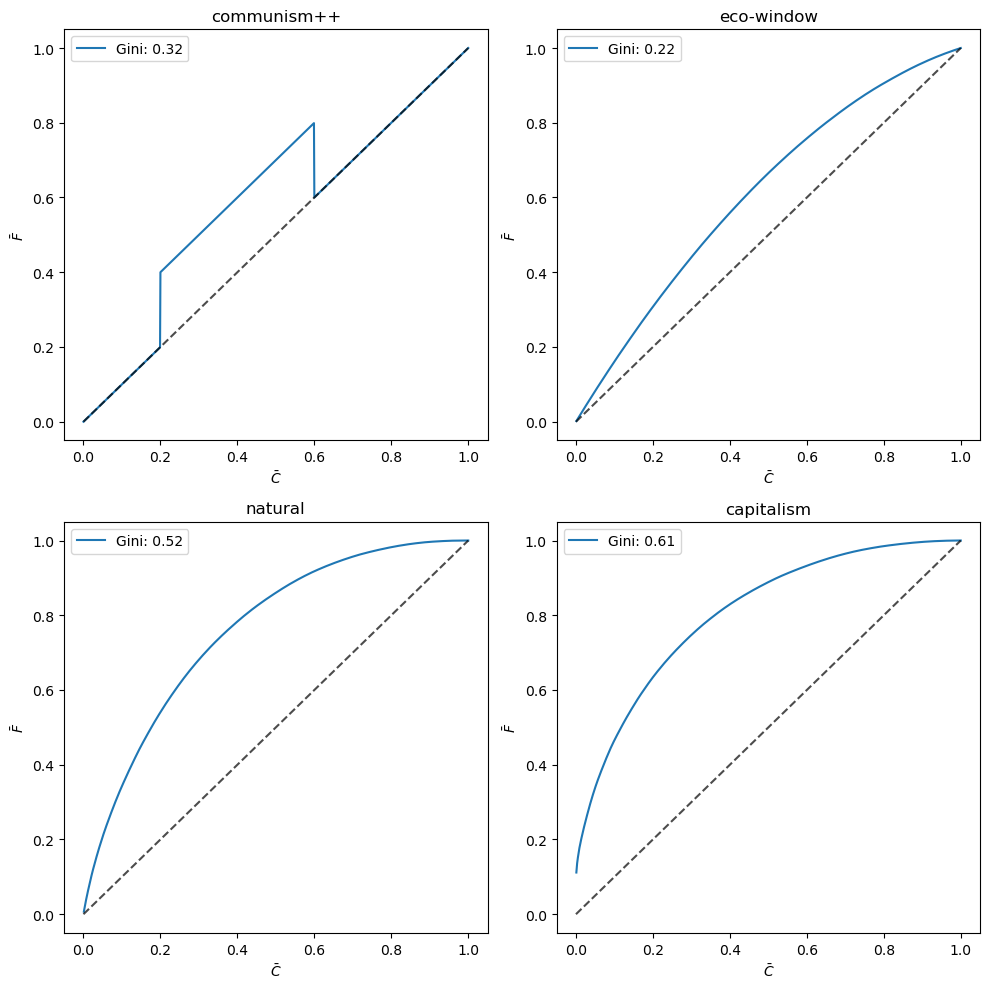

<Figure size 640x480 with 0 Axes>

In [26]:
#figure 2

def lorenz_curve_communism_pp(a, b, w, size=1000):
    num_low_income = int(size * w)
    num_high_income = size - num_low_income

    incomes = np.array([a] * num_low_income + [b] * num_high_income)
    sorted_incomes = np.sort(incomes)
    total_income = np.sum(sorted_incomes)

    cum_population = np.linspace(0, 1, size + 1)
    cum_income = np.zeros_like(cum_population)

    threshold_1 = int(0.2 * size)
    cum_income[:threshold_1 + 1] = cum_population[:threshold_1 + 1]

    threshold_2 = int(0.6 * size)
    for i in range(threshold_1, threshold_2 + 1):
        cum_income[i] = 0.4 + (cum_population[i] - 0.2) * (0.8 - 0.4) / (0.6 - 0.2)

    cum_income[threshold_2:] = cum_population[threshold_2:]

    return cum_population, cum_income

def lorenz_curve(incomes):
    sorted_incomes = np.sort(incomes)
    cum_incomes = np.cumsum(sorted_incomes)
    total_income = cum_incomes[-1]
    cum_population = np.arange(1, len(incomes) + 1) / len(incomes)
    cum_income_fraction = cum_incomes / total_income
    gini = 1 - 2 * np.trapz(cum_income_fraction, cum_population)
    return cum_population, cum_income_fraction, gini

def gini_index(cum_population, cum_income):
    area_under_lorenz = np.trapz(cum_income, cum_population)
    area_under_equality = 0.5
    gini = (area_under_equality - area_under_lorenz) / area_under_equality
    return gini

def capitalism(a, b, size):
    return np.random.pareto(a, size) * b * -1

size = 1000
a, b, w = 1, 4, 0.8
eco_a, eco_b = 1, 5
exp_mean = 1
cap_a_values = [2.5, 3.0, 3.5, 4.0]

comm_incomes = lorenz_curve_communism_pp(a, b, w, size)
eco_incomes = np.random.uniform(eco_a, eco_b, size) * -1
nat_incomes = np.random.exponential(exp_mean, size) * -1
cap_incomes = capitalism(3.5, 3, size)

models = {
    "communism++": comm_incomes,
    "eco-window": eco_incomes,
    "natural": nat_incomes,
    "capitalism": cap_incomes,
}

plt.figure(figsize=(10, 10))
for i, (label, incomes) in enumerate(models.items()):
    if label == "communism++":
        c_bar, f_bar = incomes
        gini = gini_index(c_bar, f_bar) * 2
    else:
        c_bar, f_bar, gini = lorenz_curve(incomes)

    plt.subplot(2, 2, i + 1)
    plt.plot(c_bar, f_bar, label=f"Gini: {(gini)*-1:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.7)
    plt.title(label)
    plt.xlabel(r"$\bar{C}$")
    plt.ylabel(r"$\bar{F}$")
    plt.legend()

plt.tight_layout()
plt.show()

save_dir = "pics"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

save_path = os.path.join(save_dir, "c_bar_and_f_bar.png")
plt.savefig(save_path)

In [27]:
def create_eco_window_graph(num_nodes, a, b):
    G = nx.Graph()
    degrees = np.random.randint(a, b + 1, size=num_nodes)
    
    if np.sum(degrees) % 2 != 0:
        degrees[0] += 1

    G = nx.configuration_model(degrees)
    
    G = nx.Graph(G)
    G.remove_edges_from(nx.selfloop_edges(G))
    
    return G

In [28]:
#formula 32

def calculate_c_bar_eco_window(x, G):
    degrees = np.array([deg for _, deg in G.degree()])
    a = degrees.min()
    b = degrees.max()

    if x < a:
        return 1.0
    elif x > b:
        return 0.0
    else:
        return round((b - x) / (b - a), 2)

#formula 33

def calculate_gini_eco_window(G):
    degrees = np.array([deg for _, deg in G.degree()])
    a = degrees.min()
    b = degrees.max()
    if a == b:
        return 0
    return round((b - a) / (b + a) / 3, 2)


def calculate_gini_eco_window_second(G):
    degrees = np.array([deg for _, deg in G.degree()])
    a = degrees.min()
    b = degrees.max()
    
    x_mean = (a + b) / 2
    
    def integrand(x):
        return ((b - x) * (x - a)) / ((b - a) ** 2)
    
    integral_value, _ = quad(integrand, a, b)
    
    gini_index = (1 / x_mean) * integral_value
    
    return np.round(gini_index, 2)




eco_graph = create_eco_window_graph(10, 2, 5)

c_bar_result = calculate_c_bar_eco_window(3, eco_graph)
gini_result = calculate_gini_eco_window(eco_graph)
gini_index = calculate_gini_eco_window_second(eco_graph)

print(f"c̄ =", c_bar_result)
print("Gini =", gini_result)
print("Gini Index:", gini_index)

c̄ = 0.67
Gini = 0.14
Gini Index: 0.14


In [29]:
#formula 34

def calculate_sigma_c_bar(G, c_bar):
    gini_index = calculate_gini_eco_window(G)
    sigma_c_bar = 3 * gini_index * c_bar * (1 - c_bar)
    
    return np.round(sigma_c_bar, 2)


G_generated = create_eco_window_graph(10, 3, 8)
sigma_c_bar = calculate_sigma_c_bar(G_generated, 0.5)
print("σ(C_bar):", sigma_c_bar)

σ(C_bar): 0.13


In [30]:
def create_natural_distribution_graph(num_nodes, scale):
    degrees = np.random.exponential(scale, size=num_nodes).astype(int)
    
    degrees = np.maximum(degrees, 1)
    
    if np.sum(degrees) % 2 != 0:
        degrees[0] += 1
    
    G = nx.configuration_model(degrees)
    
    G = nx.Graph(G)
    G.remove_edges_from(nx.selfloop_edges(G))
    
    return G

G = create_natural_distribution_graph(100, 2)

In [31]:
#formula 35

def calculate_C_bar_exp(G, x):
    degrees = np.array([deg for _, deg in G.degree()])
    mean_degree = np.mean(degrees)
    
    C_bar = np.exp(-x / mean_degree)
    return C_bar

G = create_natural_distribution_graph(100, 2)
x = 3
C_bar_value = calculate_C_bar_exp(G, x)
print("C̄(x):", C_bar_value)

C̄(x): 0.22313016014842982


In [32]:
#formula 36

def calculate_G_integral_exp(G):
    degrees = np.array([deg for _, deg in G.degree()])
    mean_degree = np.mean(degrees)
    
    integrand = lambda x: np.exp(-2 * x / mean_degree)
    integral_result, _ = quad(integrand, 0, np.inf)
    
    G_value = 1 - (1 / mean_degree) * integral_result
    return round(G_value, 2)

G_value = calculate_G_integral_exp(G)
print("G:", G_value)

G: 0.5


In [33]:
#formula 37

def h_bar_exp_first(G, x):
    degrees = np.array([deg for _, deg in G.degree()])
    mean_degree = np.mean(degrees)
    result = mean_degree * np.exp(-x/mean_degree)

    return np.round(result, 2)


def h_bar_second(G, x):
    degrees = np.array([deg for _, deg in G.degree()])
    mean_degree = np.mean(degrees)
    
    integrand = lambda y: np.exp(-y / mean_degree)
    integral_result, _ = quad(integrand, x, np.inf)
    
    return np.round(integral_result, 2)

h_bar_ = h_bar_exp_first(G, 3)
h_bar_second = h_bar_second(G, 3)

print("h_bar (first): ", h_bar_)
print("h_bar (second): ", h_bar_second)

h_bar (first):  0.45
h_bar (second):  0.45


In [34]:
#formula 38

def sigma_x_exp(G, x):
    degrees = np.array([deg for _, deg in G.degree()])
    mean_degree = np.mean(degrees)
    result = (x/mean_degree)*np.exp(-x/mean_degree)

    return np.round(result,2)

sigma_ = sigma_x_exp(G, 3)
print("sigma_x: ", sigma_)

sigma_x:  0.33


In [35]:
#formula 39

def x_c_bar_exp(G, c_bar):
    degrees = np.array([deg for _, deg in G.degree()])
    mean_degree = np.mean(degrees)
    result = -mean_degree * np.log(c_bar)

    return np.round(result, 2)

x_c_ = x_c_bar_exp(G, 0.5)
print("x_c_bar: ", x_c_)

x_c_bar:  1.39


In [36]:
#formula 40

def sigma_c_bar_exp(G, c_bar):
    term = -c_bar * np.log(c_bar)

    return np.round(term, 2)

sigma_c_bar_ = sigma_c_bar_exp(G, 0.5)
print("sigma c_bar: ", sigma_c_bar_)

sigma c_bar:  0.35


In [37]:
#formula 41

def calculate_s_exp(G, k=1):
    degrees = np.array([deg for _, deg in G.degree()])
    total_degree = np.sum(degrees)
    probabilities = degrees / total_degree
    
    entropy = -k * np.sum(probabilities * np.log(probabilities))
    return entropy


S_value = calculate_s_exp(G, k=1)
print("Entropy S:", S_value)

Entropy S: 4.36644582651944


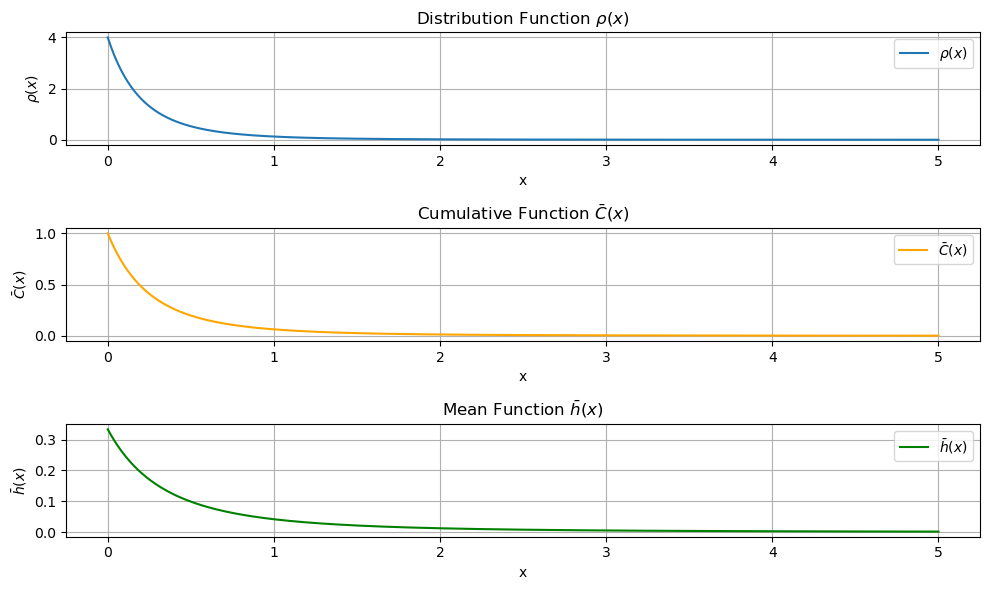

In [38]:
#formula 42
def rho_capitalism(x, A, B):
    return A * (B + 1) * (1 + A * x)**(-B - 2)

#formula 43
def C_bar_capitalism(x, A, B):
    return (1 + A * x)**(-B - 1)

#formula 44
def h_bar_capitalism(x, A, B):
    return (1 / (A * B)) * (1 + A * x)**(-B)

A = 1
B = 3

x = np.linspace(0, 5, 500)

rho_values = rho_capitalism(x, A, B)
C_bar_values = C_bar_capitalism(x, A, B)
h_bar_values = h_bar_capitalism(x, A, B)

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(x, rho_values, label=r"$\rho(x)$")
plt.title(r"Distribution Function $\rho(x)$")  # رفع اشتباه در متن LaTeX
plt.xlabel("x")
plt.ylabel(r"$\rho(x)$")
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(x, C_bar_values, label=r"$\bar{C}(x)$", color="orange")
plt.title(r"Cumulative Function $\bar{C}(x)$")
plt.xlabel("x")
plt.ylabel(r"$\bar{C}(x)$")
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(x, h_bar_values, label=r"$\bar{h}(x)$", color="green")
plt.title(r"Mean Function $\bar{h}(x)$")
plt.xlabel("x")
plt.ylabel(r"$\bar{h}(x)$")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [39]:
#formula 45
def compute_G_integral_capitalism(A, B):
    def integrand(x, A, B):
        return (1 + A * x)**(-2 * B - 2)

    result, _ = quad(integrand, 0, np.inf, args=(A, B))
    G = 1 - A * B * result
    return G

#formula 46
def compute_G_closed_capitalism(A, B):
    return (B + 1) / (2 * B + 1)

#formula 47
def sigma_x_capitalism(x, A, B):
    return A * (B + 1) * x * (1 + A * x)**(-B - 1)

#formula 48
def x_C_capitalism(C_bar, A, B):
    return (1 / A) * ((C_bar**(-1 / (B + 1))) - 1)

#formula 49
def sigma_C_capitalism(C_bar, A, B):
    return (B + 1) * (C_bar**(B / (B + 1)) - C_bar)

A = 1
B = 3
x = 0.5
C_bar = 0.5

G_integral = compute_G_integral_capitalism(A, B)
G_closed = compute_G_closed_capitalism(A, B)
print(f"G (first): {G_integral}")
print(f"G (second): {G_closed}")

sigma = sigma_x_capitalism(x, A, B)
print(f"σ(x={x}): {sigma}")

x_from_C_bar = x_C_capitalism(C_bar, A, B)
print(f"x(C_bar={C_bar}): {x_from_C_bar}")

sigma_from_C_bar_ = sigma_C_capitalism(C_bar, A, B)
print(f"σ(C_bar={C_bar}): {sigma_from_C_bar_}")

G (first): 0.5714285714285714
G (second): 0.5714285714285714
σ(x=0.5): 0.3950617283950617
x(C_bar=0.5): 0.18920711500272103
σ(C_bar=0.5): 0.37841423000544205


In [40]:
#formula 50
def s_q(k, B, probabilities):
    q = B / (B + 1)
    if q == 1:
        raise ValueError("q should not be 1! (because of devide by zero error!)")
    
    entropy = (k / (1 - q)) * np.sum([(p_i**q - p_i) for p_i in probabilities])
    return entropy

#formula 51
def gini_index(B):
    q = B / (B + 1)    
    return 1 / (q + 1)

k = 1
B = 3
probabilities = [0.2, 0.3, 0.5]

S_q = s_q(k, B, probabilities)
print(f"S_q: {S_q}")

G = gini_index(B)
print(f"G: {G}")

S_q: 1.19613344075086
G: 0.5714285714285714


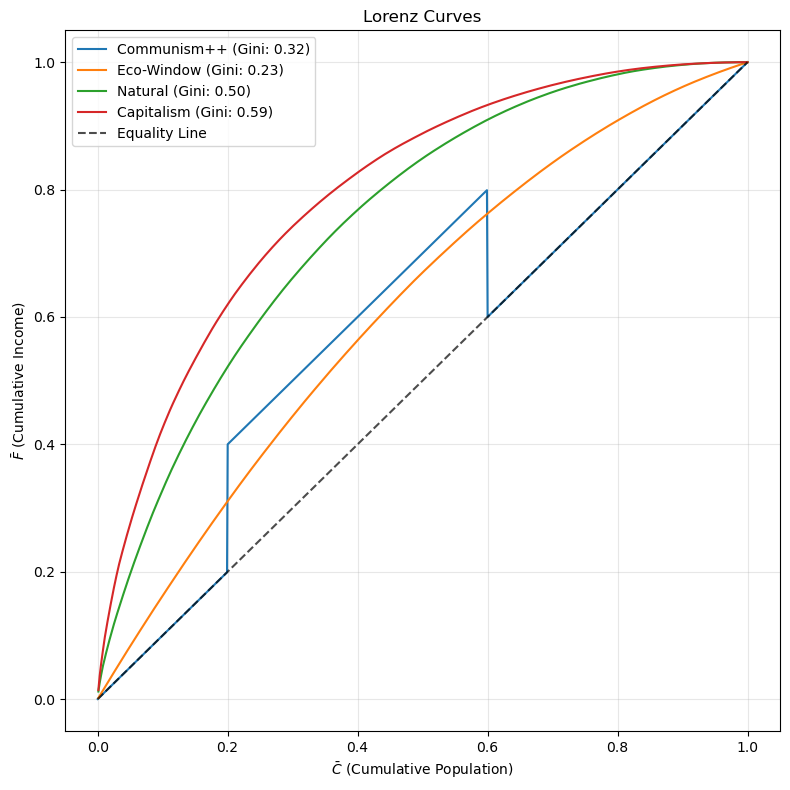

<Figure size 640x480 with 0 Axes>

In [41]:
#figure 3 - a

def lorenz_curve_communism_pp(a, b, w, size=1000):
    num_low_income = int(size * w)
    num_high_income = size - num_low_income

    incomes = np.array([a] * num_low_income + [b] * num_high_income)
    sorted_incomes = np.sort(incomes)
    total_income = np.sum(sorted_incomes)

    cum_population = np.linspace(0, 1, size + 1)
    cum_income = np.zeros_like(cum_population)

    threshold_1 = int(0.2 * size)
    cum_income[:threshold_1 + 1] = cum_population[:threshold_1 + 1]

    threshold_2 = int(0.6 * size)
    for i in range(threshold_1, threshold_2 + 1):
        cum_income[i] = 0.4 + (cum_population[i] - 0.2) * (0.8 - 0.4) / (0.6 - 0.2)

    cum_income[threshold_2:] = cum_population[threshold_2:]

    return cum_population, cum_income

def lorenz_curve(incomes):
    sorted_incomes = np.sort(incomes)
    cum_incomes = np.cumsum(sorted_incomes)
    total_income = cum_incomes[-1]
    cum_population = np.arange(1, len(incomes) + 1) / len(incomes)
    cum_income_fraction = cum_incomes / total_income
    gini = 1 - 2 * np.trapz(cum_income_fraction, cum_population)
    return cum_population, cum_income_fraction, gini

def gini_index(cum_population, cum_income):
    area_under_lorenz = np.trapz(cum_income, cum_population)
    area_under_equality = 0.5
    gini = (area_under_equality - area_under_lorenz) / area_under_equality
    return gini

def capitalism(a, b, size):
    return np.random.pareto(a, size) * b * -1

size = 1000
a, b, w = 1, 4, 0.8
eco_a, eco_b = 1, 5
exp_mean = 1

comm_incomes = lorenz_curve_communism_pp(a, b, w, size)
eco_incomes = np.random.uniform(eco_a, eco_b, size) * -1
nat_incomes = np.random.exponential(exp_mean, size) * -1
cap_incomes = capitalism(3.5, 3, size)

models = {
    "Communism++": comm_incomes,
    "Eco-Window": eco_incomes,
    "Natural": nat_incomes,
    "Capitalism": cap_incomes,
}

plt.figure(figsize=(8, 8))
for label, incomes in models.items():
    if label == "Communism++":
        c_bar, f_bar = incomes
        gini = gini_index(c_bar, f_bar) * 2
    else:
        c_bar, f_bar, gini = lorenz_curve(incomes)

    plt.plot(c_bar, f_bar, label=f"{label} (Gini: {-gini:.2f})")

plt.plot([0, 1], [0, 1], 'k--', alpha=0.7, label="Equality Line")
plt.title("Lorenz Curves")
plt.xlabel(r"$\bar{C}$ (Cumulative Population)")
plt.ylabel(r"$\bar{F}$ (Cumulative Income)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

save_dir = "pics"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)  

save_path = os.path.join(save_dir, "f_bar_and_c_bar_together.png")
plt.savefig(save_path) 

C:\Users\Hossein\AppData\Local\Temp\ipykernel_7472\3538507484.py:27: RuntimeWarning: divide by zero encountered in log
  term = -c_bar * np.log(c_bar)
C:\Users\Hossein\AppData\Local\Temp\ipykernel_7472\3538507484.py:27: RuntimeWarning: invalid value encountered in scalar multiply
  term = -c_bar * np.log(c_bar)


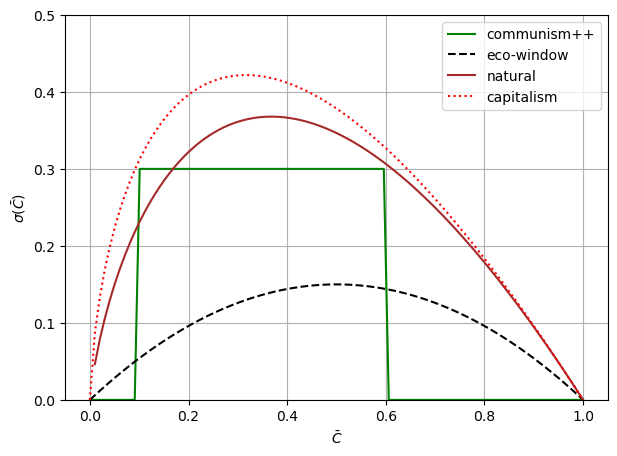

<Figure size 640x480 with 0 Axes>

In [42]:
#figure 3 - b

def calculate_sigma_formula_communism_pp_fixed(C_bar, left_bound, right_bound, height):
    if left_bound <= C_bar <= right_bound: 
        return height
    else:
        return 0.0 

def create_eco_window_graph(num_nodes, a, b):
    degrees = np.random.randint(a, b + 1, size=num_nodes)
    
    if np.sum(degrees) % 2 != 0:
        degrees[0] += 1
    
    G = nx.configuration_model(degrees)
    G = nx.Graph(G)
    G.remove_edges_from(nx.selfloop_edges(G))
    
    return G

def calculate_sigma_c_bar(G, c_bar):
    gini_index = 0.2 
    sigma_c_bar = 3 * gini_index * c_bar * (1 - c_bar)
    return sigma_c_bar

def sigma_c_bar_exp(G, c_bar):
    term = -c_bar * np.log(c_bar)
    return term

def sigma_C_capitalism(C_bar, A, B):
    return (B + 1) * (C_bar**(B / (B + 1)) - C_bar)


num_nodes = 100
a, b = 1, 5
left_bound, right_bound = 0.1, 0.6 
height = 0.3

c_bar_values = np.linspace(0, 1, 100)

sigma_comm = [
    calculate_sigma_formula_communism_pp_fixed(c, left_bound, right_bound, height)
    for c in c_bar_values
]

G_comm = create_income_graph_communism_pp(100, 1, 5, 0.5)
G_eco = create_eco_window_graph(100, 1, 5)
sigma_eco = [calculate_sigma_c_bar(G_eco, c) for c in c_bar_values]

sigma_nat = [sigma_c_bar_exp(G_comm, c) for c in c_bar_values]

sigma_cap = [sigma_C_capitalism(c, A=1, B=3) for c in c_bar_values]

plt.figure(figsize=(7, 5))
plt.plot(c_bar_values, sigma_comm, label='communism++', color='green')
plt.plot(c_bar_values, sigma_eco, label='eco-window', linestyle='--', color='black')
plt.plot(c_bar_values, sigma_nat, label='natural', color='brown')
plt.plot(c_bar_values, sigma_cap, label='capitalism', linestyle=':', color='red')

plt.xlabel(r'$\bar{C}$')
plt.ylabel(r'$\sigma(\bar{C})$')
plt.legend()
plt.grid(True)
plt.ylim(0, 0.5) 
plt.show()


save_dir = "pics"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)  

save_path = os.path.join(save_dir, "sigma_and_c_bar_together.png")
plt.savefig(save_path) 